In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [4]:
df_pred = pd.read_csv('../prediction/prediction.csv', header=None)
df_pred.columns = ['UMIs', 'Doublet']
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20954 entries, 0 to 20953
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UMIs     20954 non-null  object
 1   Doublet  20954 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 327.5+ KB


In [5]:
df_pred['Doublet'].value_counts()

Doublet
0    18238
1     2716
Name: count, dtype: int64

In [6]:
df_train = pd.read_csv('../train/training.csv')
df_train.columns = ['UMIs', 'Doublet']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UMIs     999 non-null    object
 1   Doublet  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [7]:
df_train['Doublet'].value_counts()

Doublet
0    855
1    144
Name: count, dtype: int64

In [20]:
doublets = df_train[df_train['Doublet']==1]['UMIs']
singlets = df_train[df_train['Doublet']==0]['UMIs']

In [9]:
df_analysis = pd.read_csv('../test_data/sce_analysis.csv', index_col=0)
df_analysis

,cxds_score,bcds_score,hybrid_score,cxds_call,bcds_call,hybrid_call
AGAGCGAAGATCTGCT,3.019673e+04,0.708056,1.247998,True,True,True
ACATCAGTCTGACCTC,2.163955e+04,0.703681,1.092262,True,True,True
TTCTCCTGTCCTGCTT,6.827146e+03,0.507470,0.629397,True,False,True
GAAACTCTCATGTAGC,1.181685e+04,0.820639,1.038479,True,True,True
CAGTCCTGTCTAGCCG,1.873341e+04,0.562479,0.896213,True,True,True
...,...,...,...,...,...,...
TTTATGCTCTTGTACT,6.434841e-17,0.030720,0.020226,False,False,False
ATAACGCCAAGCTGGA,3.115676e-23,0.030016,0.019504,False,False,False
ATTACTCAGTGGACGT,1.707922e-31,0.019958,0.009199,False,False,False
CGTGTCTCAAGCGTAG,2.550374e-28,0.044342,0.034183,False,False,False


In [24]:
doublet_df = df_analysis[df_analysis.index.isin(doublets)]

doublet_df

,cxds_score,bcds_score,hybrid_score,cxds_call,bcds_call,hybrid_call
TCTGAGACATCACGTA,1.459035e+04,0.547812,0.807952,True,False,True
CCTCAGTGTAGTAGTA,3.297346e+04,0.878325,1.471543,True,True,True
TGGCCAGGTATCTGCA,2.372578e+04,0.777537,1.204812,True,True,True
CCTTCCCCATCGATGT,1.966153e+04,0.579873,0.930440,True,True,True
GCGGGTTGTCCATGAT,6.532295e+03,0.348443,0.461240,True,False,False
...,...,...,...,...,...,...
CTTGGCTTCAAGAAGT,1.056291e+01,0.067179,0.057770,False,False,False
CGCTTCACAGTCGTGC,1.620126e+03,0.142789,0.163693,False,False,False
CGTAGGCCACTGTCGG,2.611975e+02,0.081878,0.077261,False,False,False
TCTTCGGTCTTCTGGC,5.283252e+01,0.350841,0.349168,False,False,False


In [27]:
doublet_df.columns

Index(['cxds_score', 'bcds_score', 'hybrid_score', 'cxds_call', 'bcds_call',
       'hybrid_call'],
      dtype='object')

In [32]:
doublet_df['hybrid_call'].value_counts()

hybrid_call
True     83
False    61
Name: count, dtype: int64

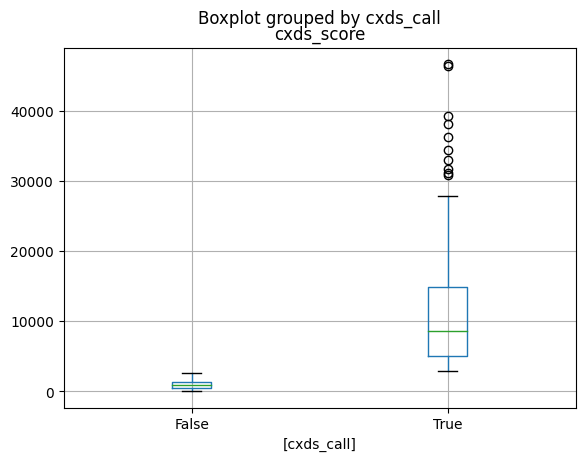

In [29]:
boxplot = doublet_df.boxplot(
    column=['cxds_score'], 
    by=['cxds_call'],
)

In [4]:
df_train = pd.read_csv("../prediction/prediction5/df_train.csv")
df_train

,UMI,doublet,doublet_detected,doublet_score
0,GCTCTGTCAATGGATA,1,1.0,2.723823e+02
1,GATGAGGGTACGAAAT,0,1.0,3.724646e+02
2,AGGCCACGTACAGCAG,0,0.0,6.849729e-05
3,ACGCCGAGTCACACGC,0,0.0,4.106492e-23
4,TCTTCGGAGGCTAGCA,0,0.0,1.086942e-49
...,...,...,...,...
995,ACTGCTCCACTCGACG,0,0.0,3.052982e-02
996,TGGTTAGGTAAACGCG,0,1.0,1.400135e+02
997,TTCTCAATCAGTACGT,1,1.0,3.684269e+02
998,TGAGCCGGTCTCTTAT,0,0.0,1.967257e-04


In [6]:
df_train['assign'] = df_train['doublet'].map(lambda x: 'doublet' if x == 1 else 'singlet')
df_train

,UMI,doublet,doublet_detected,doublet_score,assign
0,GCTCTGTCAATGGATA,1,1.0,2.723823e+02,doublet
1,GATGAGGGTACGAAAT,0,1.0,3.724646e+02,singlet
2,AGGCCACGTACAGCAG,0,0.0,6.849729e-05,singlet
3,ACGCCGAGTCACACGC,0,0.0,4.106492e-23,singlet
4,TCTTCGGAGGCTAGCA,0,0.0,1.086942e-49,singlet
...,...,...,...,...,...
995,ACTGCTCCACTCGACG,0,0.0,3.052982e-02,singlet
996,TGGTTAGGTAAACGCG,0,1.0,1.400135e+02,singlet
997,TTCTCAATCAGTACGT,1,1.0,3.684269e+02,doublet
998,TGAGCCGGTCTCTTAT,0,0.0,1.967257e-04,singlet


In [21]:
df_train['assign_detected'] = df_train['doublet_detected'].map(lambda x: 'doublet' if x==1 else 'singlet')
df_train

,UMI,doublet,doublet_detected,doublet_score,assign,assign_detected
0,GCTCTGTCAATGGATA,1,1.0,2.723823e+02,doublet,doublet
1,GATGAGGGTACGAAAT,0,1.0,3.724646e+02,singlet,doublet
2,AGGCCACGTACAGCAG,0,0.0,6.849729e-05,singlet,singlet
3,ACGCCGAGTCACACGC,0,0.0,4.106492e-23,singlet,singlet
4,TCTTCGGAGGCTAGCA,0,0.0,1.086942e-49,singlet,singlet
...,...,...,...,...,...,...
995,ACTGCTCCACTCGACG,0,0.0,3.052982e-02,singlet,singlet
996,TGGTTAGGTAAACGCG,0,1.0,1.400135e+02,singlet,doublet
997,TTCTCAATCAGTACGT,1,1.0,3.684269e+02,doublet,doublet
998,TGAGCCGGTCTCTTAT,0,0.0,1.967257e-04,singlet,singlet


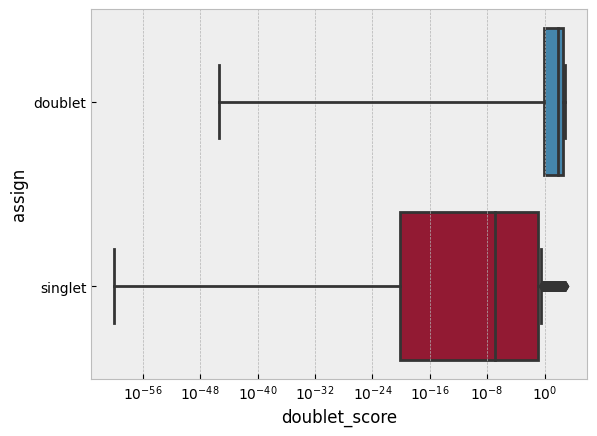

In [20]:
sns.boxplot(x=df_train['doublet_score'], y=df_train['assign'])
plt.xscale('log')

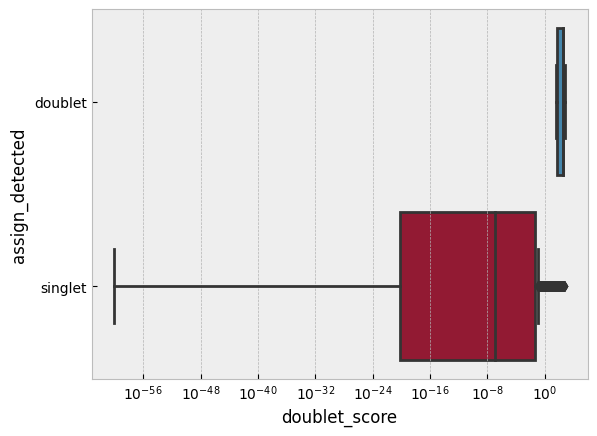

In [22]:
sns.boxplot(x=df_train['doublet_score'], y=df_train['assign_detected'])
plt.xscale('log')

In [23]:
df_train[df_train['assign']=='singlet']['assign_detected'].value_counts()

assign_detected
singlet    802
doublet     53
Name: count, dtype: int64

In [24]:
df_train[df_train['assign']=='doublet']['assign_detected'].value_counts()

assign_detected
singlet    73
doublet    72
Name: count, dtype: int64

In [25]:
df_train[df_train['assign']=='singlet']['doublet_score'].describe()

count    8.550000e+02
mean     1.687934e+01
std      6.883730e+01
min      8.827736e-61
25%      7.358281e-21
50%      1.299355e-07
75%      1.435105e-01
max      6.524328e+02
Name: doublet_score, dtype: float64

In [28]:
df_train[df_train['assign']=='singlet']['doublet_score'].value_counts()

doublet_score
1.086942e-49    29
2.103197e-38    26
3.759623e-19    15
3.835109e+01    15
4.543993e+01    13
                ..
5.115720e-05     1
3.625417e+02     1
7.626204e+01     1
9.686024e-38     1
2.653425e-34     1
Name: count, Length: 629, dtype: int64

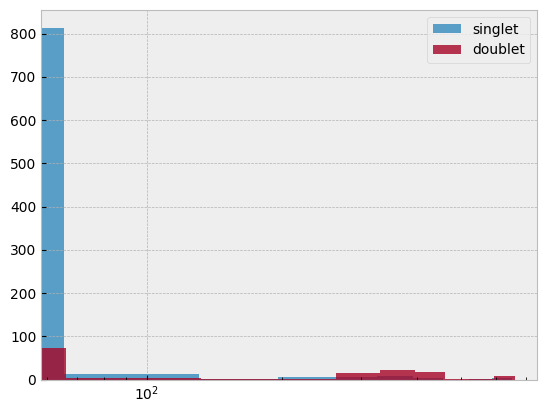

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df_train[df_train['assign']=='singlet']['doublet_score'], 
        histtype='bar', alpha=0.8)
ax.hist(df_train[df_train['assign']=='doublet']['doublet_score'], 
        histtype='bar', alpha=0.8)

ax.legend(['singlet', 'doublet'])
plt.xscale('log')

plt.show()

In [38]:
num_synth = int(21000*0.15)
choices = np.random.choice(21000, size=(num_synth, 2), replace=False)
parents = [list(p) for p in choices]

choices[:, 0]

array([ 3305,  7433,  9917, ...,  6464, 16994, 13063])